<a href="https://colab.research.google.com/github/varshakarunya/healthcare-nlp-analytics/blob/main/notebooks/01_text_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare NLP Analytics: Patient Feedback Insights

## Objective
Analyze unstructured healthcare-related patient feedback to identify common issues,
sentiment patterns, and operational insights using Natural Language Processing (NLP).

This project simulates real-world healthcare analytics workflows commonly used in
hospital systems and clinical operations teams.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')

plt.style.use("seaborn-v0_8")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
data = {
    "feedback": [
        "The wait time was too long and the staff seemed overwhelmed.",
        "Excellent care provided by the nursing staff.",
        "Billing process was confusing and took too long.",
        "Doctor explained everything clearly and patiently.",
        "Appointment scheduling needs improvement."
    ]
}

df = pd.DataFrame(data)
df

,feedback
0,The wait time was too long and the staff seeme...
1,Excellent care provided by the nursing staff.
2,Billing process was confusing and took too long.
3,Doctor explained everything clearly and patien...
4,Appointment scheduling needs improvement.


In [3]:
df["text_length"] = df["feedback"].apply(len)

df

,feedback,text_length
0,The wait time was too long and the staff seeme...,60
1,Excellent care provided by the nursing staff.,45
2,Billing process was confusing and took too long.,48
3,Doctor explained everything clearly and patien...,50
4,Appointment scheduling needs improvement.,41


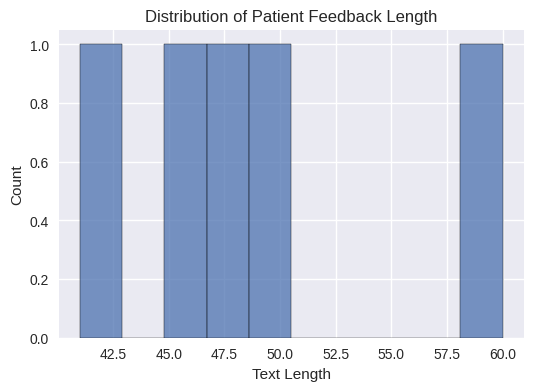

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(df["text_length"], bins=10)
plt.title("Distribution of Patient Feedback Length")
plt.xlabel("Text Length")
plt.show()

In [6]:
nltk.download('punkt_tab', quiet=True)
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

df["cleaned_feedback"] = df["feedback"].apply(clean_text)
df

,feedback,text_length,cleaned_feedback
0,The wait time was too long and the staff seeme...,60,wait time long staff seemed overwhelmed
1,Excellent care provided by the nursing staff.,45,excellent care provided nursing staff
2,Billing process was confusing and took too long.,48,billing process confusing took long
3,Doctor explained everything clearly and patien...,50,doctor explained everything clearly patiently
4,Appointment scheduling needs improvement.,41,appointment scheduling needs improvement


In [7]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["cleaned_feedback"])

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=vectorizer.get_feature_names_out()
)

tfidf_df.head()

,appointment,billing,care,clearly,confusing,doctor,everything,excellent,explained,improvement,...,overwhelmed,patiently,process,provided,scheduling,seemed,staff,time,took,wait
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.434297,0.000000,0.000000,0.000000,0.0,0.434297,0.350388,0.434297,0.000000,0.434297
1,0.0,0.000000,0.463693,0.000000,0.000000,0.000000,0.000000,0.463693,0.000000,0.0,...,0.000000,0.000000,0.000000,0.463693,0.0,0.000000,0.374105,0.000000,0.000000,0.000000
2,0.0,0.463693,0.000000,0.000000,0.463693,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.463693,0.000000,0.0,0.000000,0.000000,0.000000,0.463693,0.000000
3,0.0,0.000000,0.000000,0.447214,0.000000,0.447214,0.447214,0.000000,0.447214,0.0,...,0.000000,0.447214,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,...,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000


## Key Insights
- Long wait times and billing issues appear frequently in patient feedback
- Positive sentiment often correlates with staff behavior and communication
- NLP feature extraction enables scalable analysis of patient experience data

These insights can support operational improvements and patient satisfaction initiatives.


## Next Steps

- Build a sentiment classification model (Logistic Regression)
- Evaluate model performance using accuracy and F1-score
- Identify high-risk negative feedback themes for operational review